<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/MedicalInsuaranceCostPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [112]:
dataset = pd.read_csv('/content/insurance.csv')

In [113]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [115]:
print(dataset.shape)
dataset.isnull().sum()

(1338, 7)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [116]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-117-6b645d0ec33b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'])


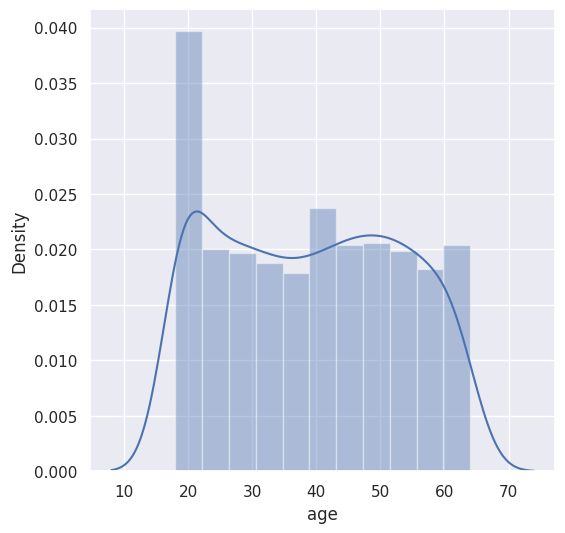

In [117]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset['age'])
plt.show()

<ipython-input-118-d4542c9a1dfc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['bmi'])


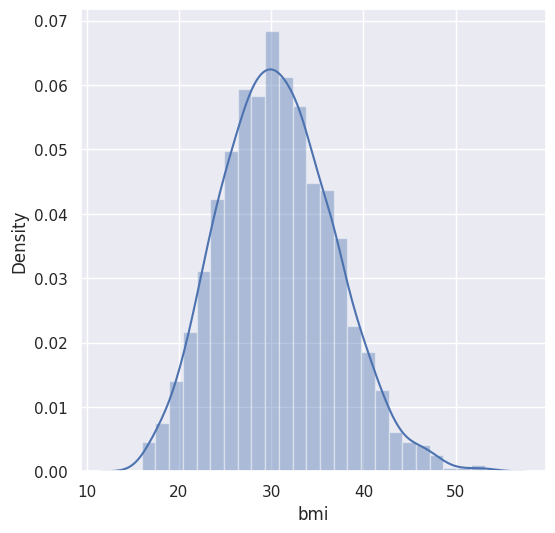

In [118]:
# distribution of bmi value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset['bmi'])
plt.show()

As you can see in the above figure, a lot of people have bmi more than 24, stating they are over weight

ideal bmi -> (18.5 to 24)

<Axes: xlabel='sex', ylabel='count'>

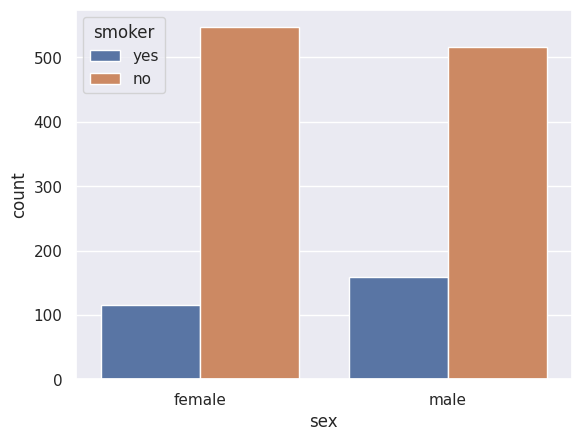

In [119]:
sns.countplot(x='sex', hue='smoker', data=dataset)

<Axes: xlabel='region', ylabel='count'>

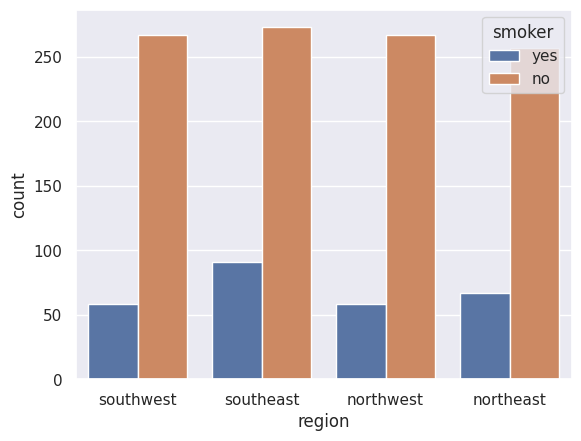

In [120]:
sns.countplot(x='region', hue='smoker', data=dataset)

<Axes: xlabel='children', ylabel='count'>

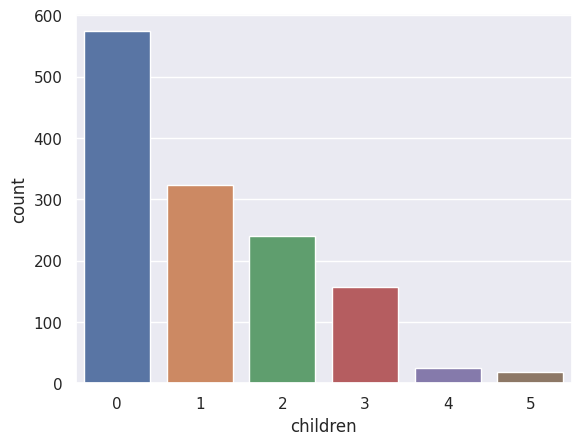

In [121]:
sns.countplot(x='children', data=dataset)

#Label Encoding
giving integer values to categorical features

In [122]:
dataset['sex'].value_counts() # 2 different categories in the feature 'sex'

male      676
female    662
Name: sex, dtype: int64

In [123]:
dataset['smoker'].value_counts() # 2 different categories in the feature 'smoker'

no     1064
yes     274
Name: smoker, dtype: int64

In [124]:
dataset['region'].value_counts() # 4 different categories in the feature 'region'

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [125]:
dataset = dataset.replace({ "sex":{"male":0, "female":1}, "smoker":{"yes":0, "no":1}, "region":{"southwest":0, "southeast":1, 
                                                          "northwest":2, "northeast":3} })
# the values are changed to categorical values now
print(dataset.head())
print(dataset.tail())

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       0       0  16884.92400
1   18    0  33.770         1       1       1   1725.55230
2   28    0  33.000         3       1       1   4449.46200
3   33    0  22.705         0       1       2  21984.47061
4   32    0  28.880         0       1       2   3866.85520
      age  sex    bmi  children  smoker  region     charges
1333   50    0  30.97         3       1       2  10600.5483
1334   18    1  31.92         0       1       3   2205.9808
1335   18    1  36.85         0       1       1   1629.8335
1336   21    1  25.80         0       1       0   2007.9450
1337   61    1  29.07         0       0       2  29141.3603


#Splitting and Training the model

In [126]:
x = dataset.drop(columns='charges', axis=1) # contains the dataset without the target feature
y = dataset['charges'] # contains the target feature

In [127]:
# splitting the dataset into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [128]:
print(x.shape, y.shape)

(1338, 6) (1338,)


In [129]:
model = LinearRegression()

In [130]:
model.fit(x_train, y_train)

LinearRegression()

#Evaluation

In [131]:
training_data_prediction = model.predict(x_train)
test_data_prediction = model.predict(x_test)

In [132]:
# always keep the actual values as the first parameter
accuracy_score_1 = metrics.r2_score(y_train, training_data_prediction)
accuracy_score_2 = metrics.r2_score(y_test, test_data_prediction)

In [133]:
print("training accuracy:", accuracy_score_1)
print("test accuracy:", accuracy_score_2)

training accuracy: 0.7519923667088932
test accuracy: 0.7445422986536503


#Predictive System

In [139]:
input_data = (33,	0,	22.705,	0,	1,	2) 
input_data = np.array(input_data)
input_data = input_data.reshape(1, -1)# we reshape it as the model is still expecting 1070 datapoints, but 
                                      # since we are only predicting for 1, we have to reshape accordingly
prediction = model.predict(input_data)
print("Charges: ", prediction)

Charges:  [3698.51508856]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [137]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [142]:
# using Lasso regression model
lasso = Lasso()
lasso.fit(x_train, y_train)
training_data_prediction = lasso.predict(x_train)
test_data_prediction = lasso.predict(x_test)
# always keep the actual values as the first parameter
accuracy_score_1 = metrics.r2_score(y_train, training_data_prediction)
accuracy_score_2 = metrics.r2_score(y_test, test_data_prediction)
print("training accuracy:", accuracy_score_1)
print("test accuracy:", accuracy_score_2)

training accuracy: 0.7519922794279676
test accuracy: 0.7445455323126557


In [143]:
input_data = (33,	0,	22.705,	0,	1,	2) 
input_data = np.array(input_data)
input_data = input_data.reshape(1, -1)# we reshape it as the model is still expecting 1070 datapoints, but 
                                      # since we are only predicting for 1, we have to reshape accordingly
prediction = model.predict(input_data)
print("Charges: ", prediction)

Charges:  [3698.51508856]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
